In [1]:
#載入jieba套件
import jieba
import jieba.analyse

In [2]:
#設定中文字典
jieba.set_dictionary('dict.txt')

In [3]:
#載入文字計數、文字雲與繪圖套件
from collections import Counter
from wordcloud import WordCloud
from matplotlib import pyplot as plt

In [5]:
#開啟停用字詞檔案
with open('stopwords.txt', 'r', encoding='utf8') as f:stops = f.read().split('\n') 

In [6]:
#載入pandas套件
import pandas as pd

In [7]:
#讀取檔案
df=pd.read_excel('C:/Users/ena88/Desktop/Final Project Data.xlsx')

In [8]:
#檢視檔案
df

,星數,binary,店家,內容
0,5,1.0,RealFix手機維修,"Sony XZP充電無反應修理主機板～推薦大家來這修唷～～在外修了好幾家都沒修好,來這一次搞..."
1,5,1.0,RealFix手機維修,我的iPhone在出國前一刻撲街，液晶顯示器壞掉，好在老闆幫我趕工修理好，還順道幫我換了新的...
2,5,1.0,RealFix手機維修,s7e 泡水受潮開機鍵無法使用，現場快速檢修到好，價格還很實在！
3,5,1.0,RealFix手機維修,更換電池速度快速，而且老闆人很客氣，幫忙處理很多東西，非常推👍。
4,5,1.0,RealFix手機維修,沒想到在半小時內就能修復手機螢幕！跟全新的一樣！CP值超級高！
5,5,1.0,RealFix手機維修,維修很快速，去修充電孔和背板，不到四十分鐘就處理好了
6,5,1.0,RealFix手機維修,非常好的店家，修理好我困擾已久的問題，快速又專業，值得推薦😍
7,5,1.0,RealFix手機維修,維修快，店員服務態度很好(๑•̀ᄇ•́)و ✧
8,5,1.0,RealFix手機維修,如智慧型手機壞了先找Realfix手機維修店就對了！因原廠維修服務要排隊又要等很久啊！Rea...
9,5,1.0,RealFix手機維修,老闆的服務實在是太棒了，換電池20分鐘搞定，有手機問題都可以過來喲！👍👍👍


In [10]:
#複製excel的評論內容部分並命名為test
test='今天去這家德誼門市，詢問The new iPad的維修事宜，門市的小姐竟然查都不查，就直接開口說:"你要維修??那直接拿四千塊來，給你換台新的。"這是怎樣阿="=...什麼態度!?我這台還沒過保，你查都不查，直接跟我討錢!!! 服務態度越來越需要加強囉~ 買不到什麼 同樣華為門市，微風南山的華為門市服務好多了 雖然三創離家比較近 但以後會直接去微風南山消費。還有八樓的維修中心和這間一樓體驗店是不同單位 有些評價給錯了。 打電話過去問維修的事情 態度不佳 說我們這裡是門市不是維修中心 網路上第一個查的電話就這邊 客人怎麼會分的清楚？一種我很莫名奇妙的態度說 「你要去維修中心啊 我這裡是門市」這是服務業的態度嗎？ 服務很好沒錯，價格低沒錯，但換SE尾插，換了兩個零件還是壞的。雖然只要800元但說是原廠零件（網路爬個文大概就知道可信度幾成）。東西拿回來要仔細檢查。親眼看老闆把崩牙的螺絲拔起來放旁邊沒鎖回去就交件，抱怨了才補新螺絲（還跟手機不同色）。每次都說明天就好但中間白跑至少三趟修了兩週。東西拿回來要仔細檢查。親眼看老闆把崩牙的螺絲拔起來放旁邊沒鎖回去就交件，抱怨了才補新螺絲（還跟手機不同色）。每次都說明天就好但中間白跑至少三趟修了兩週。只要價格合理可以接受東西堪用就好也願意等待，但無法接受店家不據實以告。 老闆生意太好太忙了 在捷運站旁，生意不錯，但是服務精神不是很好。檢測和障礙排除沒有別的店家來的細心，收費也比較貴。 做工不精細，我的iPhone被銼開後，邊緣都被銼壞了 維修往來過程出了點誤會，但售後服務挺好的。ps.更換MBA電源晶片10000 環境很舒適，但收費偏貴，而且工程師常常一連處理別的東西讓人等很久。上次拿去重灌後系統壞掉，本來重灌前都好好的，一灌下去電腦常常藍頻、死當，許多應用程式也不能正常運行，拿回去希望工程師能解決，卻說可能硬體壞了，如果壞了這些問題在重灌前就該出現，怎麼會是重灌完ㄧ拿回家就有問題，送廠檢測還要需要另外等7天，說得一副就是要你準備好花錢換硬體，以後不會再光顧了。空間感覺不差，但最新機種(zenfone 5)只有單一顏色可做體驗，其中有支新機(zenfone 5)沒電好一段時間，會讓人誤以為故障、新機不耐用，希望能夠華碩能夠加強新機的品牌形象，讓「體驗」更名符其實，加油！希望未來可以在手機市場佔有一席之地！ 店員態度冷漠 這兩顆星是給換電池的部分，換電池非常迅速沒話說也專業。然而還送修了另一隻手機，因為需要留店檢修，但是一直跟我說什麼時間可以檢查完畢但一直延遲，延遲是完全沒關係的，但是貴店都沒有主動通知我，時間一改再改改了三次，三次都是我主動打電話詢問才再告訴我約定時間沒辦法拿取，最後一次跟我說約定當天在關店之前一定可以拿到手機，結果眼看晚上7點了，貴店要關門了還是沒有打算要電話告知我是可以拿到還是如何，直到我打電話過去，才知道手機不是留在當初的貴店檢修，當時他們也在找在檢修我手機的廠商，因為聯絡不到人，對方沒有接電話。最後貴店終於找到對方了，然後關門前也才拿回手機，最終沒有收取我任何費用。我其實不明白如果今日沒辦法照約定時間交辦，為何不提早主動告知就好了，我排開時間等著去拿手機，但換來的一而再再而三的浪費我時間，希望貴店真的要注意這一點。是完全沒關係的，但是貴店都沒有主動通知我，時間一改再改改了三次，三次都是我主動打電話詢問才再告訴我約定時間沒辦法拿取，最後一次跟我說約定當天在關店之前一定可以拿到手機，結果眼看晚上7點了，貴店要關門了還是沒有打算要電話告知我是可以拿到還是如何，直到我打電話過去，才知道手機不是留在當初的貴店檢修，當時他們也在找在檢修我手機的廠商，因為聯絡不到人，對方沒有接電話。最後貴店終於找到對方了，然後關門前也才拿回手機，最終沒有收取我任何費用。我其實不明白如果今日沒辦法照約定時間交辦，為何不提早主動告知就好了，我排開時間等著去拿手機，但換來的一而再再而三的浪費我時間，希望貴店真的要注意這一點。 DIY電子零件必來的地方，不過真的需要整頓一下，太冷清了。 沒在賣什麼東西，可能被網路搶走了 跟旁邊的八德路，光華新天地，三創不能比，太舊了，除非要買電子零件，不然實在不需要來 空間品質稍差 停車費很貴 失焦的電子廣場 周六下午2點送修HTC x9螢幕(3000元修到好),原定週日下午2點取件,第一次到達,延到16:30取件,第二到了,再延到18:00總算拿到手. 客服人員態度冷冰冰，回答制式化！ 現場工程師態度不算好 既然屬於服務性質，別太商業。 網路預約後還要等十分鐘才有人開始處理，前台服務態度像是我欠他錢一樣。接待工程師倒是有耐心，但剛買一個月的手機換個螢幕要等七個工作天。這樣的品牌經營，難怪要賣掉了。 老闆超不老實且態度超差，超不推薦！！！修完螢幕觸控失靈，還讓手機留下被鞘起的大凹痕，超爛店 本來相信專業由他估價，事後發現被欺騙很不開心。老闆一副你活該的樣子。建議去前先多方做好功課 修完螢幕後 回家發現電池變不正常  態度很差，不老實 約好週六可以拿，結果週日還不能拿，不能準時交件也不主動通知。一句話：那就退錢，覺得別人的時間浪費是理所當然。整個感覺極惡劣。 服務態度極差，沒東西還讓客人等三，四十分鐘，才告知沒貨。還作勢打人，可惡到極點。 手機螢幕送修後背光亮度大減，使用不到幾天螢幕開始出現黑點點，回店詢問說以上問題均不在保固範圍內，還說什麼用起來就很正常阿，態度極差睜眼說瞎話，只是想馬上轟人出去，還被嗆買這爛手機沒什麼好要求的，騙說原廠螢幕材料，根本就是組裝螢幕，還敢說維修後有保固，不愧是網路上有名的黑心店家，真後悔沒先看GOOGLE評論就跑去維修，請受害者們一同到消保會檢舉 換螢幕，說好換原廠東西根本不是原廠，螢幕跟手機體還分開的，接縫處都溢膠，手機邊全部都刮的亂七八糟。開收據還不開換原廠液晶，品項還開「原裝液晶」，不修還要8百塊！態度相當惡劣，建議之後跟我一樣沒先看評論，直接線上進入消保法流程！ 訂個材料還會訂錯 造成客戶的麻煩 維修s7 edge 玻璃 修完當晚就發生閃頻 跟店家反應 還說是我原本的「隱藏性故障」老闆和老闆娘態度超差 原本想好好溝通完全不正面看你還說我的反應是在練蕭威 超級不專業且不負責任的店家 修不好還一肚子怨氣 千萬別以為可以省錢維修 只會讓你花更多錢和寶貴時間！！ 我只能說！瞎到爆的一家店！我必須跟華安道歉！是我沒早點看到！我真的很後悔很後悔！為什麼沒有早點看到Google評論！為什麼我沒看到啦！如果早點看到就不會這麼後悔了！不會修就算了！修不好也認了！但做人基本道理不會，那就糟糕了！你們的硬掰功力強到不行。我也想學，但身為人的我學不來，因為手機自己修壞了，怪客人？高招啦！怎麼學得來。維修電腦的功力好不好我不知道。但維修手機我真的當場想吐血。別在出來害人了！真的。 爛透了!!!本來手機只是玻璃破掉(觸控顯示接正常)，花錢換了螢幕，當晚就出現問題，隔一兩天完全掛了，確說液晶不在保固範圍，要再負擔一筆更換螢幕價錢，很扯很扯~~~~明明回家馬上反映此問題，老闆卻說我們再練肖話(台語)，如此不負責任態度，沒修還尚可使用，修了之後完全無法使用!!! 我買的是華為p9p壓感螢幕 寄來的沒壓感 還不能觸控 又說我機板有問題 舊的裝回就正常 寄回去說不能退還說鏡頭玻璃有刮傷不做任何處理 叫我自行取回不可能幫我寄 勸大家不要在這買比較好 有換過華為的趕快測試壓感看看你們的有沒有問題 價錢至少差了500-1000我的比價是以淘寶×5換算的 態度很差 非常惡質的店家！換完螢幕，隔天就破掉！對消費者大小聲、惡劣無比！老闆賺這種沒道德的錢，難道不會良心不安嗎？ 去修理平板，更換觸控面板 1800元 ，店家使用二手面板(邊緣龜裂)，未先告知就算了，詢問店家後，被很兇地回應，說你這很舊了不然要怎麼樣，我拆還你。(以上均為店內服務小姐回應)。舊的我能接受，只是也該是先告知吧，詢問還被兇，在此留下本人維修心得，供其他想維修的人參考。另一位維修先生態度是不錯，我只是要理性溝通沒想到得到這樣的回應。 若你只想貪圖便宜，那就建議一定要有閒再去，取件後在現場測試6小時以上，否則一旦離開後發現觸碰有問題(明明你自己很清楚根本沒摔到)，老闆都會說是你人為因素造成，不在保固範圍(因為現場有貼公告)。省的無奈白花錢受氣還修不好! 爛透了，手機本來還能用只是要換螢幕，結果修完後變成是完全當機不能用的狀態，還硬拗說手機本來就是壞的不想認帳連道歉也沒有 修完手機刮痕很誇張 螢幕黑點。手機訊號還變差不知道是用到甚麼，還說只負責要換的地方，好一個地方其他都壞了 修了手機，過兩個禮拜螢幕就微裂了(保證沒摔到或壓到)。打電話去說是我摔到.....不保固還急著掛電話  不推。自認倒楣 看到這則評論的你請慎選店家，我曾經去修螢幕，結果一天就壞，於是過了一個週日，我再次前往，而我確定這兩天我沒有摔到手機，然而店家卻強力指責說我說謊，並對我毀謗，最後拆開來卻發現只是工程師手藝爛，造成手機容易晃動就接觸不良，然而店家不只不跟我道歉，還在Line上面封鎖我，聰明的你看到評論，就知道這家店可不是一個上選。 越修越糟，態度還極差無比 服務人員態度非常差 越修反而手機壞更慘 店家態度惡劣 極度不推!!!!!!!!!! 態度差'

In [12]:
stops.append('\n')  ##分行符號加入停用字中
stops.append('\n\n')
terms = [t for t in jieba.cut(test, cut_all=True) if t not in stops] #進行斷詞
sorted(Counter(terms).items(), key=lambda x:x[1], reverse=True)  ## 這個寫法很常出現在Ｃounter中，他可以排序，list每個item出現的次數。

[('', 771),
 ('手機', 31),
 ('說', 28),
 ('態度', 22),
 ('螢幕', 18),
 ('維修', 16),
 ('店', 14),
 ('沒', 14),
 ('修', 14),
 ('時間', 14),
 ('沒有', 13),
 ('換', 12),
 ('電話', 12),
 ('店家', 12),
 ('貴', 12),
 ('差', 12),
 ('服務', 11),
 ('老闆', 10),
 ('次', 10),
 ('壞', 9),
 ('問題', 8),
 ('兩', 7),
 ('東西', 7),
 ('不能', 7),
 ('主動', 7),
 ('告知', 7),
 ('門市', 6),
 ('詢問', 6),
 ('什', 6),
 ('打電話', 6),
 ('知道', 6),
 ('拿回', 6),
 ('件', 6),
 ('點', 6),
 ('完全', 6),
 ('是我', 6),
 ('約定', 6),
 ('真的', 6),
 ('看到', 6),
 ('查', 5),
 ('直接', 5),
 ('需要', 5),
 ('網路', 5),
 ('原廠', 5),
 ('就好', 5),
 ('工程', 5),
 ('工程師', 5),
 ('本來', 5),
 ('前', 5),
 ('正常', 5),
 ('希望', 5),
 ('天', 5),
 ('不會', 5),
 ('檢修', 5),
 ('三', 5),
 ('最後', 5),
 ('拿到', 5),
 ('買', 5),
 ('修完', 5),
 ('先', 5),
 ('保固', 5),
 ('想', 5),
 ('評論', 5),
 ('家', 4),
 ('華為', 4),
 ('零件', 4),
 ('眼看', 4),
 ('螺絲', 4),
 ('回去', 4),
 ('重灌', 4),
 ('新機', 4),
 ('定時', 4),
 ('沒辦法', 4),
 ('辦法', 4),
 ('到手', 4),
 ('關門', 4),
 ('觸控', 4),
 ('發現', 4),
 ('惡劣', 4),
 ('使用', 4),
 ('後悔', 4),
 ('不好', 4),
 ('摔', 4),
 ('比較

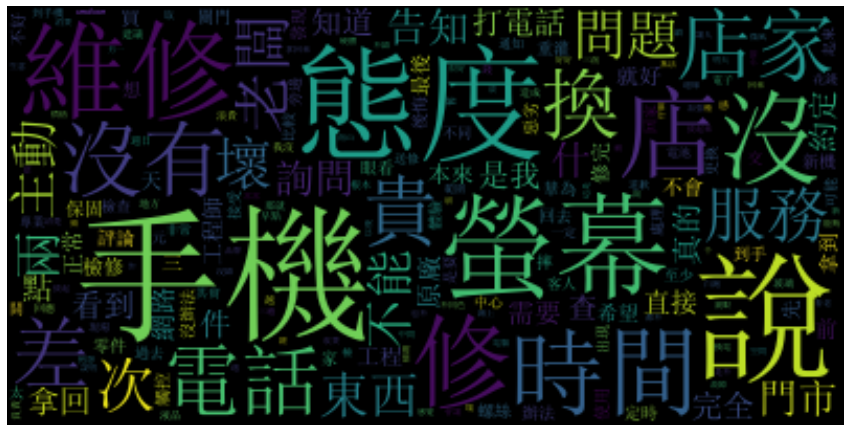

In [13]:
#利用文字雲和繪圖套件做文字雲
wordcloud = WordCloud(font_path="simsun.ttf")  ##做中文時務必加上字形檔
wordcloud.generate_from_frequencies(frequencies=Counter(terms))
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

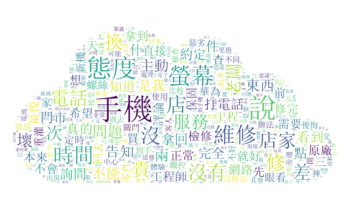

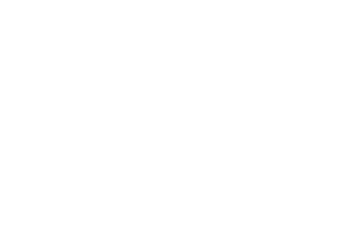

In [14]:
#利用文字雲和繪圖套件做另一種有遮罩的文字雲
from PIL import Image

alice_mask = np.array(Image.open("cloud_mask7.png"))  
wc = WordCloud(background_color="white", max_words=500, mask=alice_mask, font_path="simsun.ttf")
wc.generate_from_frequencies(Counter(terms))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.axis("off")
plt.show()
